# Sleep EEG rapid eye movements detection

## Intoductory notes:
This notebook presents REMs detection functionality.

Recommended readings:
1. [YASA: FAQ](https://raphaelvallat.com/yasa/build/html/faq.html#event-detection)
2. [YASA: Rapid Eye Movements (REMs) detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/07_REMs_detection.ipynb)
3. [YASA: REMResults class](https://raphaelvallat.com/yasa/build/html/generated/yasa.REMResults.html#yasa.REMResults)

## Import module
Add pipeline module to path and import its elements (just run this cell).

In [1]:
%matplotlib widget
from sleepeeg.pipeline import RapidEyeMovementsPipe

## REMs detection

In [2]:
rems_pipe = RapidEyeMovementsPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\interpolated_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\interpolated_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\interpolated_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


03-May-23 09:04:05 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.rem_detect.html) for details about the arguments.

In [3]:
rems_pipe.detect(
    loc_chname="E46",
    roc_chname="E238",
    include=4,
    freq_rem=(0.5, 5),
    duration=(0.3, 1.2),
    amplitude=(50, 325),
    remove_outliers=False,
    save=True
)

Setting 127370 of 2229773 (5.71%) samples to NaN, retaining 2102403 (94.29%) samples.
Setting 127370 of 2229773 (5.71%) samples to NaN, retaining 2102403 (94.29%) samples.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.REMResults.html#yasa.REMResults.summary) for details about the arguments.

In [11]:
rems_pipe.results.summary(
    grp_stage=False, 
    mask=None, 
    aggfunc='mean', 
    sort=True
)

,Start,Peak,End,Duration,LOCAbsValPeak,ROCAbsValPeak,LOCAbsRiseSlope,ROCAbsRiseSlope,LOCAbsFallSlope,ROCAbsFallSlope,Stage
0,3737.352,3737.952,3738.428,1.076,56.476785,48.546808,89.970342,9.229342,107.743307,304.960889,4
1,4009.048,4009.220,4009.420,0.372,67.189970,78.825900,124.277596,589.408579,244.572419,438.502289,4
2,4030.600,4031.172,4031.348,0.748,47.025652,89.568688,110.655114,40.136798,212.759820,931.890390,4
3,4065.932,4066.196,4066.732,0.800,45.782018,72.986948,142.221212,490.810678,20.019378,206.619349,4
4,4068.212,4068.500,4068.940,0.728,73.868205,145.900853,177.720024,623.042427,186.091441,309.533687,4
5,4239.788,4240.388,4240.484,0.696,67.884573,74.493377,86.337658,109.839240,391.146256,947.498136,4
6,4240.484,4240.712,4241.312,0.828,57.197058,83.822306,383.910481,295.420447,45.834942,109.177699,4
7,4241.400,4242.000,4242.100,0.700,88.389649,54.347533,158.865084,70.421507,223.796130,838.493970,4


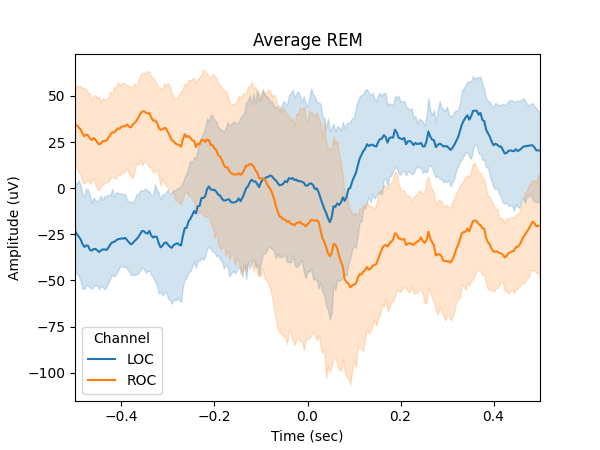

In [16]:
rems_pipe.plot_average( 
    save=True, 
    center="Peak",
    time_before=0.5,
    time_after=0.5,
    filt=(None,None),
    mask=None,
    )